In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset.csv')

In [21]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(columns=['Class'])
Y = data['Class']

Scalar = StandardScaler()
Scalar.fit_transform(X)

samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random

def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma,max_iter = 100)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
bestAccuracy = []
bestKernel = []
bestC = []
bestGamma = []
iteration = 100
convergence_scores = []
convergence_graph = []

for i in range(len(samples)):
    best_accuracy= 0
    best_C = 0
    best_gamma = 0
    best_kernel = None
    for k in kernel:
        X_train_random, X_test_random, y_train_random, y_test_random = samples[i]
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        score = fitnessFunction(k, C, gamma)
        if score>best_accuracy:
            best_accuracy = round(score,2)
            best_C = round(C,2)
            best_gamma = round(gamma, 2)
            best_kernel  = k
        convergence_scores.append(score) 
    bestAccuracy.append(best_accuracy)
    bestC.append(best_C)
    bestGamma.append(best_gamma)
    bestKernel.append(best_kernel)
    convergence_graph.append(convergence_scores)
    print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best C = ', C, 'Best Gamma = ', gamma)

Best Accuracy =  0.53 Best Kernel =  linear Best C =  8.888767339606758 Best Gamma =  5.131935603697975
Best Accuracy =  0.53 Best Kernel =  linear Best C =  4.699378568418472 Best Gamma =  9.502173417808105
Best Accuracy =  0.53 Best Kernel =  linear Best C =  8.574618695875651 Best Gamma =  3.5696421653592147
Best Accuracy =  0.53 Best Kernel =  linear Best C =  9.634938604088239 Best Gamma =  9.081165468688537
Best Accuracy =  0.53 Best Kernel =  linear Best C =  8.231685147994908 Best Gamma =  8.19380774197619
Best Accuracy =  0.53 Best Kernel =  linear Best C =  4.75233070151824 Best Gamma =  6.821408395251025
Best Accuracy =  0.53 Best Kernel =  linear Best C =  9.872551269668238 Best Gamma =  5.1076545910796405
Best Accuracy =  0.53 Best Kernel =  linear Best C =  1.371863225217067 Best Gamma =  8.944849872734641
Best Accuracy =  0.53 Best Kernel =  poly Best C =  9.724034865784805 Best Gamma =  6.678811891164563
Best Accuracy =  0.53 Best Kernel =  linear Best C =  3.9990329031

In [26]:
data = {
    'Sample': ['Sample'+str(i+1) for i in range(len(samples))],
    'BestAccuracy': bestAccuracy,
    'BestC': bestC,
    'BestGamma': bestGamma,
    'BestKernel': bestKernel
}
df = pd.DataFrame(data)
print(df)

     Sample  BestAccuracy  BestC  BestGamma BestKernel
0   Sample1          0.53   3.81       7.35     linear
1   Sample2          0.53   2.74       9.53     linear
2   Sample3          0.53   7.31       4.23     linear
3   Sample4          0.53   6.48       6.96     linear
4   Sample5          0.53   6.94       3.08     linear
5   Sample6          0.53   4.39       6.11     linear
6   Sample7          0.53   4.50       8.51     linear
7   Sample8          0.53   1.00       1.14     linear
8   Sample9          0.53   9.38       9.36       poly
9  Sample10          0.53   4.95       9.43     linear


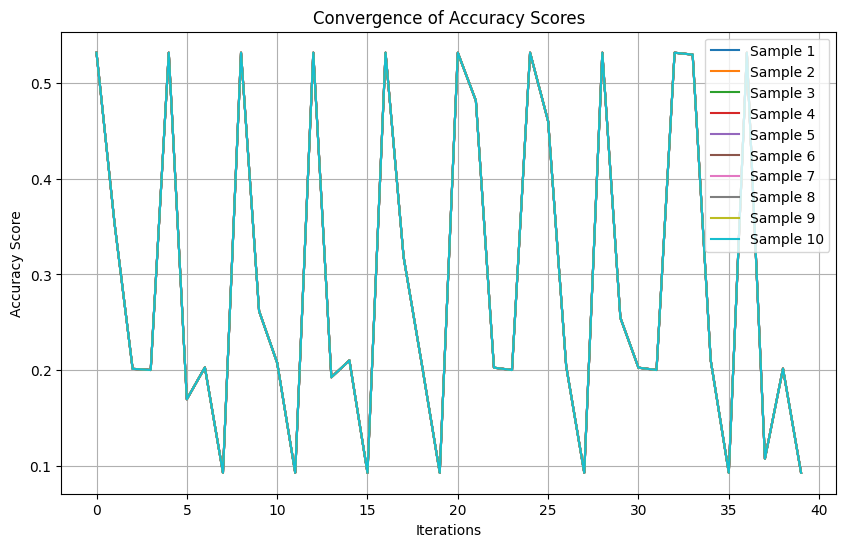

In [ ]:
# Plot convergence graph
plt.figure(figsize=(10, 6))
for i, scores in enumerate(convergence_graph):
    plt.plot(scores, label=f'Sample {i+1}')
plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('Convergence of Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()